## Minimum degree algorithm

In [3]:
from scipy.sparse import random
import numpy  as np
import matplotlib.pyplot as plt
import networkx as nx


def matrix2graph(matrix:np.array, visualize=False):
    """
    convert matrix into graph
    :param matrix: positive definite (PD) matrix 
    :return: an undirected graph
    """
    G = nx.Graph()
    # add nodes
    n = matrix.shape[0]
    nodes = range(n)
    G.add_nodes_from(nodes)
    # add edge
    for i in range(n):
        for j in range(i+1, n):
            if matrix[i,j] != 0:
                G.add_edge(i, j)
    # visualize
    if visualize:
        plt.figure()
        nx.draw(G, with_labels=True)
    return G

def random_m(size, density=0.02, visualize=False):
    """
    generate a sparse random matrix
    """
    # generate a random sparse matrix
    S = random(size, size, density=density, format='csr') 
    S = np.dot(S.T,S)
    S = S + 0.1*np.identity(size) 
    if visualize:
        plt.figure()
        plt.spy(S.A)
    return S

def permute(mtrx, p):
    I = np.identity(mtrx.shape[0])
    I = I[p]
    return I@mtrx@I.T

def min_order(G,p):
    """
    minimum order degree algorithm
    :param G: Networkx undirected graph
    :param p: order list
    :return: a list of new order
    """
    # base case:
    if len(list(G.nodes)) <1:
        p += list(G.nodes)
        return p
    # select the node with the minimum degree
    all_nodes = list(G.degree)
    select_node = sorted(all_nodes, key=lambda x: x[1])[0][0]
    # record the selection
    p.append(select_node)
    # add chordal if exists
    adj_nodes = list(G.adj[select_node])
    for i, node in enumerate(adj_nodes[:-1]):
        adj_pair = (node, adj_nodes[i+1])
        if adj_pair not in G.edges:
            G.add_edge(node, adj_nodes[i+1])
    # update the graph
    G.remove_node(select_node) 
    return min_order(G,p)

def mesh_matrix(g_size:int) -> np.array:
    """
    create mesh-like (planar) PD matrix, 
    :param g_size: size of the related graph
    :return: positive definite matrix
    """
    # matrix width
    m_size = g_size**2 
    mx = np.identity(m_size)*10
    for i in range(m_size):
        if (i+1) % g_size == 1:
            mx[i][i+1] = 1
        elif (i+1) % g_size == 0:
            mx[i][i-1] = 1
        else:
            mx[i][i-1] = 1
            mx[i][i+1] = 1
    j = 0
    for i in range(g_size, m_size):
        mx[i][j] = 1
        mx[j][i] = 1
        j += 1
    return mx



### Test case 1
Toy

[0, 4, 20, 24, 1, 5, 2, 3, 6, 10, 8, 7, 14, 9, 11, 15, 21, 12, 16, 22, 13, 17, 18, 19, 23]


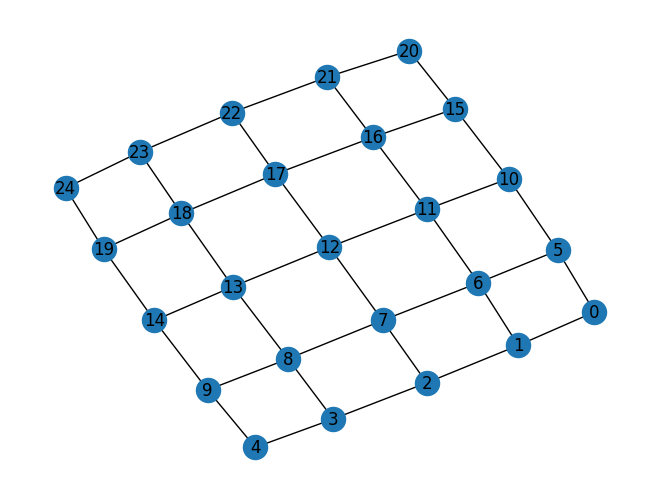

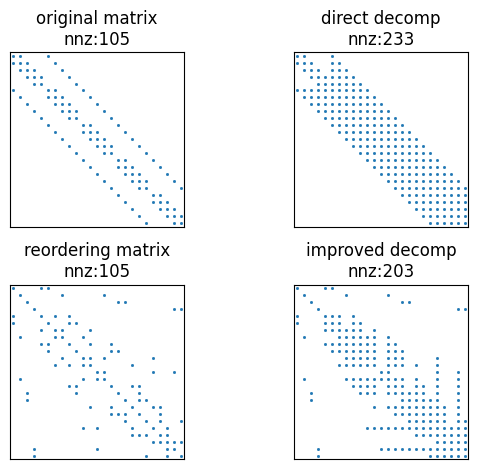

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)


# mtrix =  np.array([[2,1,0,1,0,0,0,0,0],
#      [1,4,1,0,1,0,0,0,0],
#      [0,1,6,0,0,1,0,0,0],
#      [1,0,0,8,1,0,1,0,0],
#      [0,1,0,1,10,1,0,1,0],
#      [0,0,1,0,1,12,0,0,1],
#      [0,0,0,1,0,0,14,1,0],
#      [0,0,0,0,1,0,1,16,1],
#      [0,0,0,0,0,1,0,1,18]]).astype('float64')

# G = matrix2graph(mtrix)
# p = min_order(G,[])

# # permutation
# I = np.identity(mtrix.shape[0])
# I = I[p]
# new_mtrix = I@mtrix@I.T
np.random.seed(10)
# test case 1
mtrix = mesh_matrix(5)
G = matrix2graph(mtrix,True)
p = min_order(G,[])
new_mtrix = permute(mtrix,p)
print(p)



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.spy(mtrix, markersize=1)
ax1.set_title("original matrix\nnnz:{}".format(np.count_nonzero(mtrix)))

L = np.linalg.cholesky(mtrix)
L = L+L.T
ax2.spy(L, markersize=1)
ax2.set_title("direct decomp\nnnz:{}".format(np.count_nonzero(L)))

ax3.spy(new_mtrix, markersize=1)
ax3.set_title("reordering matrix\nnnz:{}".format(np.count_nonzero(new_mtrix)))

L_ = np.linalg.cholesky(new_mtrix)
L_ += L_.T
ax4.spy(L_, markersize=1)
ax4.set_title("improved decomp\nnnz:{}".format(np.count_nonzero(L_)))
# fig.autofmt_xdate()
ax1.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, top=False,labeltop=False)
ax2.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, top=False,labeltop=False)
ax3.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, top=False,labeltop=False)
ax4.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, top=False,labeltop=False)
plt.tight_layout()


## Test case 2:

200x200 random

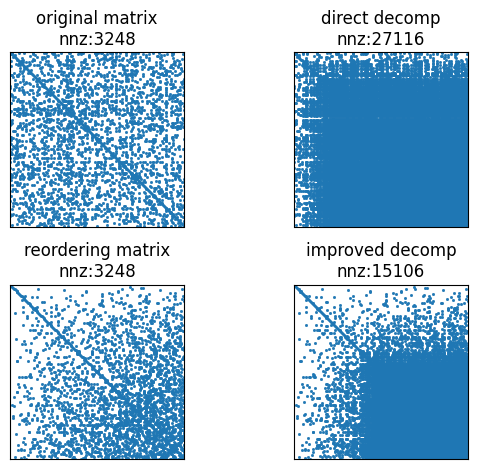

In [28]:
np.random.seed(2023)

mtrix = random_m(200)
G = matrix2graph(mtrix)
p = min_order(G,[])

# permutation
I = np.identity(mtrix.shape[0])
I = I[p]
new_mtrix = I@mtrix@I.T



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.spy(mtrix, markersize=1)
ax1.set_title("original matrix\nnnz:{}".format(np.count_nonzero(mtrix)))

L = np.linalg.cholesky(mtrix)
L = L+L.T
ax2.spy(L, markersize=1)
ax2.set_title("direct decomp\nnnz:{}".format(np.count_nonzero(L)))

ax3.spy(new_mtrix, markersize=1)
ax3.set_title("reordering matrix\nnnz:{}".format(np.count_nonzero(new_mtrix)))

L_ = np.linalg.cholesky(new_mtrix)
L_ += L_.T
ax4.spy(L_, markersize=1)
ax4.set_title("improved decomp\nnnz:{}".format(np.count_nonzero(L_)))
# fig.autofmt_xdate()
ax1.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, top=False,labeltop=False)
ax2.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, top=False,labeltop=False)
ax3.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, top=False,labeltop=False)
ax4.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, top=False,labeltop=False)
plt.tight_layout()

### Test case 3:
west0739 benchmark

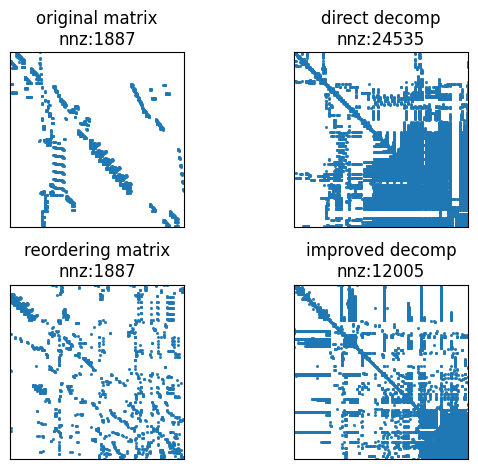

In [31]:
import scipy.io
import numpy as np
from scipy.linalg import lu

mtrix = scipy.io.loadmat('./TestData/matrix.mat')['west0479'].toarray()

G = matrix2graph(mtrix,False)
p = min_order(G,[])
new_mtrix = permute(mtrix,p)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.spy(mtrix, markersize=1)
ax1.set_title("original matrix\nnnz:{}".format(np.count_nonzero(mtrix)))

# L = np.linalg.cholesky(mtrix)
_, L, _ = lu(mtrix)
L += L.T
ax2.spy(L, markersize=1)
ax2.set_title("direct decomp\nnnz:{}".format(np.count_nonzero(L)))
ax3.spy(new_mtrix, markersize=1)
ax3.set_title("reordering matrix\nnnz:{}".format(np.count_nonzero(new_mtrix)))

# L_ = np.linalg.cholesky(new_mtrix)
_, L_, _ = lu(new_mtrix)
L_ += L_.T
ax4.spy(L_, markersize=1)
ax4.set_title("improved decomp\nnnz:{}".format(np.count_nonzero(L_)))
# fig.autofmt_xdate()
ax1.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, top=False,labeltop=False)
ax2.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, top=False,labeltop=False)
ax3.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, top=False,labeltop=False)
ax4.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, top=False,labeltop=False)
plt.tight_layout()